## Imports

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import shutil
import numpy as np
from pathlib import Path
import glob
import matplotlib.pyplot as plt

## Data Loading

In [2]:
URL = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

In [3]:
zip_file = tf.keras.utils.get_file(fname='flower_photos.tgz',
                        origin=URL,
                        untar=True)

228818944/228813984 [==============================] - 1s 0us/step


In [4]:
zip_dir_base = os.path.dirname(zip_file)
!find $zip_dir_base -type d -print

/root/.keras/datasets
/root/.keras/datasets/flower_photos
/root/.keras/datasets/flower_photos/sunflowers
/root/.keras/datasets/flower_photos/tulips
/root/.keras/datasets/flower_photos/dandelion
/root/.keras/datasets/flower_photos/daisy
/root/.keras/datasets/flower_photos/roses


In [5]:
base_dir = os.path.join(os.path.dirname(zip_file), 'flower_photos')

## Create paths

The dataset we downloaded contains images of 5 types of flowers:

1. Rose
2. Daisy
3. Dandelion
4. Sunflowers
5. Tulips

So, let's create the labels for these 5 classes: 

In [6]:
classes = ['roses', 'daisy', 'dandelion', 'sunflowers', 'tulips']

In [7]:
for cl in classes:
  img_path = os.path.join(base_dir, cl)
  images = glob.glob(img_path + '/*.jpg')
  print("{}: {} Images".format(cl, len(images)))
  train, val = images[:round(len(images)*0.8)], images[round(len(images)*0.8):]

  for t in train:
    if not os.path.exists(os.path.join(base_dir, 'train', cl)):
      os.makedirs(os.path.join(base_dir, 'train', cl))
    shutil.move(t, os.path.join(base_dir, 'train', cl))

  for v in val:
    if not os.path.exists(os.path.join(base_dir, 'val', cl)):
      os.makedirs(os.path.join(base_dir, 'val', cl))
    shutil.move(v, os.path.join(base_dir, 'val', cl))

roses: 641 Images
daisy: 633 Images
dandelion: 898 Images
sunflowers: 699 Images
tulips: 799 Images


In [8]:
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

## Data augmentation

In [9]:
EPOCHS = 100
IMG_SHAPE = 150
BATCH_SIZE = 100

In [10]:
train_image_gen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest'
      )

In [11]:
train_data_gen = train_image_gen.flow_from_directory(
    directory=train_dir,
    target_size=(IMG_SHAPE, IMG_SHAPE),
    class_mode='sparse',
    batch_size=BATCH_SIZE,
    shuffle=True
)

Found 2935 images belonging to 5 classes.


In [12]:
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=BATCH_SIZE,
                                                 directory=val_dir,
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='sparse')

Found 735 images belonging to 5 classes.


## Define model and train

In [16]:
cnn_model = tf.keras.Sequential([
                                        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SHAPE, IMG_SHAPE, 3)),
                                        tf.keras.layers.MaxPool2D(pool_size=(2,2)),

                                        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
                                        tf.keras.layers.MaxPool2D(pool_size=(2,2)),

                                        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
                                        tf.keras.layers.MaxPool2D(pool_size=(2,2)),

                                        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
                                        tf.keras.layers.MaxPool2D(pool_size=(2,2)),

                                        tf.keras.layers.Dropout(0.2),
                                        tf.keras.layers.Flatten(),
                                        tf.keras.layers.Dense(512, activation='relu'),
                                        tf.keras.layers.Dense(5, activation='softmax')
                                        ])

In [19]:
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

In [21]:
history = cnn_model.fit(
    train_data_gen,
    validation_data=val_data_gen,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS
)

Epoch 1/100
30/30 [==============================] - 23s 756ms/step - loss: 1.4580 - accuracy: 0.4436 - val_loss: 1.4588 - val_accuracy: 0.4503
Epoch 2/100
30/30 [==============================] - 22s 743ms/step - loss: 1.4713 - accuracy: 0.4235 - val_loss: 1.4193 - val_accuracy: 0.4898
Epoch 3/100
30/30 [==============================] - 22s 747ms/step - loss: 1.4320 - accuracy: 0.4671 - val_loss: 1.4312 - val_accuracy: 0.4694
Epoch 4/100
30/30 [==============================] - 22s 750ms/step - loss: 1.4156 - accuracy: 0.4855 - val_loss: 1.4041 - val_accuracy: 0.4925
Epoch 5/100
30/30 [==============================] - 23s 753ms/step - loss: 1.4082 - accuracy: 0.4940 - val_loss: 1.3993 - val_accuracy: 0.4966
Epoch 6/100
30/30 [==============================] - 23s 753ms/step - loss: 1.4132 - accuracy: 0.4869 - val_loss: 1.3850 - val_accuracy: 0.5075
Epoch 7/100
30/30 [==============================] - 23s 755ms/step - loss: 1.3470 - accuracy: 0.5523 - val_loss: 1.3695 - val_accuracy:

## Visualise results of training

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

Text(0.5, 1.0, 'Training and Validation Loss')

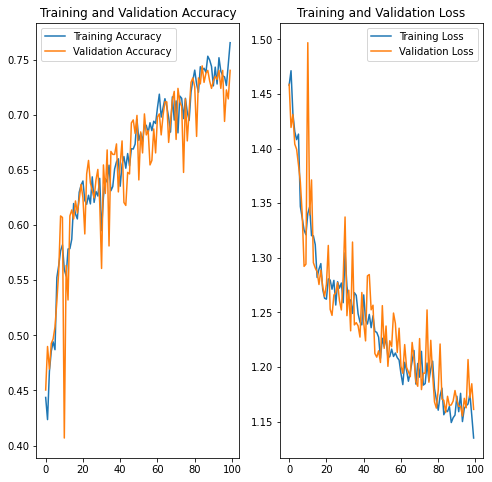

In [23]:
plt.figure(figsize=(8, 8))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend()
plt.title("Training and Validation Accuracy")

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend()
plt.title("Training and Validation Loss")